In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import math
import seaborn as sns

In [2]:
# Read in all data
raw = pd.read_excel('S&P_500_Researcher_Dataset_1979_-_2018.xlsx', sheet_name=None)

In [3]:
# Separate Share Prices Excel Sheet
raw_share_prices = raw['Share Prices']
type(raw_share_prices)

pandas.core.frame.DataFrame

In [4]:
raw_share_prices.head()

,Ticker,ISIN Code,Company Name,1979-03-31 00:00:00,1979-06-30 00:00:00,1979-09-30 00:00:00,1979-12-31 00:00:00,1980-03-31 00:00:00,1980-06-30 00:00:00,1980-09-30 00:00:00,...,2017-12-31 00:00:00,2018-01-31 00:00:00,2018-02-28 00:00:00,2018-03-31 00:00:00,2018-04-30 00:00:00,2018-05-31 00:00:00,2018-06-30 00:00:00,2018-07-31 00:00:00,2018-08-31 00:00:00,2018-09-30 00:00:00
0,A,US00846U1016,Agilent Technologies Inc.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,66.97,73.43,68.59,66.90,65.74,61.92,61.84,66.04,67.54,70.54
1,AA,US0138171014,Alcoa Inc,54.38,51.38,58.88,54.88,58.25,58.75,72.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AAL,US02376R1023,American Airlines Group,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,52.03,54.32,54.25,51.96,42.93,43.54,37.96,39.54,40.48,41.33
3,AAL (Alex),US0144761055,Alexander & Alexander,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AAP,US00751Y1064,Advance Auto Parts Inc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,99.69,116.99,114.25,118.55,114.45,128.62,135.70,141.23,164.03,168.33


In [5]:
# Create sample Data
raw_samp = raw_share_prices.head()

In [6]:
raw_samp = raw_samp.iloc[1:]

In [7]:
# Drop unneeded columns
raw_samp.drop("ISIN Code", inplace=True, axis=1)

raw_samp.drop("Company Name", inplace=True, axis=1)

In [8]:
raw_samp_outtest = raw_samp.T

In [9]:
raw_samp_outtest.head()

,1,2,3,4
Ticker,AA,AAL,AAL (Alex),AAP
1979-03-31 00:00:00,54.38,NaN,NaN,NaN
1979-06-30 00:00:00,51.38,NaN,NaN,NaN
1979-09-30 00:00:00,58.88,NaN,NaN,NaN
1979-12-31 00:00:00,54.88,NaN,NaN,NaN


In [10]:
raw_h = raw_samp_outtest.iloc[0]

In [11]:
list(raw_h)

['AA', 'AAL', 'AAL (Alex)', 'AAP']

In [12]:
raw_samp_out_wh = raw_samp_outtest.iloc[1:]

In [13]:
raw_samp_out_wh.columns = list(raw_h)

In [17]:
raw_samp_out_wh.fillna(0, inplace=True)

C:\Users\Bonew\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3787: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


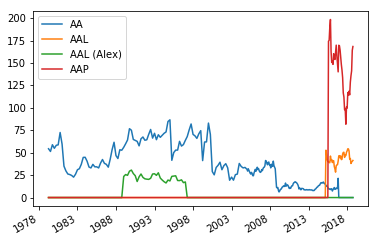

In [18]:
raw_samp_out_wh.plot()

In [15]:
type(raw)

collections.OrderedDict

In [16]:
raw_share_prices = raw_share_prices.fillna(0)
raw_share_prices.head(3)

,Ticker,ISIN Code,Company Name,1979-03-31 00:00:00,1979-06-30 00:00:00,1979-09-30 00:00:00,1979-12-31 00:00:00,1980-03-31 00:00:00,1980-06-30 00:00:00,1980-09-30 00:00:00,...,2017-12-31 00:00:00,2018-01-31 00:00:00,2018-02-28 00:00:00,2018-03-31 00:00:00,2018-04-30 00:00:00,2018-05-31 00:00:00,2018-06-30 00:00:00,2018-07-31 00:00:00,2018-08-31 00:00:00,2018-09-30 00:00:00
0,A,US00846U1016,Agilent Technologies Inc.,0.00,0.00,0.00,0.00,0.00,0.00,0.0,...,66.97,73.43,68.59,66.90,65.74,61.92,61.84,66.04,67.54,70.54
1,AA,US0138171014,Alcoa Inc,54.38,51.38,58.88,54.88,58.25,58.75,72.5,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,AAL,US02376R1023,American Airlines Group,0.00,0.00,0.00,0.00,0.00,0.00,0.0,...,52.03,54.32,54.25,51.96,42.93,43.54,37.96,39.54,40.48,41.33


In [21]:
raw_share_prices.transpose()

,0,1,2,3,4,5,6,7,8,9,...,1396,1397,1398,1399,1400,1401,1402,1403,1404,1405
0,Ticker,A,AA,AAL,AAL (Alex),AAP,AAPL,ABBV,ABC,ABC (Bro.),...,MSCI,ABMD,EVRG,TWTR,FLT,HFC,BR,CPRT,ANET,WCG
1,ISIN Code,US00846U1016,US0138171014,US02376R1023,US0144761055,US00751Y1064,US0378331005,US00287Y1091,US03073E1055,US0247351028,...,US55354G1004,US0036541003,US30034W1062,US90184L1026,US3390411052,US4361061082,US11133T1034,US2172041061,US0404131064,US94946T1060
2,Company Name,Agilent Technologies Inc.,Alcoa Inc,American Airlines Group,Alexander & Alexander,Advance Auto Parts Inc,Apple Inc.,AbbVie Inc.,AmerisourceBergen Corp.,American Broadcasting Cos Inc,...,MSCI Inc,ABIOMED Inc,Evergy Inc,Twitter Inc,FleetCor Technologies Inc,HollyFrontier Corp,Broadridge Financial Solutions Inc,Copart Inc,Arista Networks Inc,WellCare Health Plans Inc
3,1979-03-31 00:00:00,0,54.38,0,0,0,0,0,0,34.38,...,0,0,0,0,0,0,0,0,0,0
4,1979-06-30 00:00:00,0,51.38,0,0,0,0,0,0,41.38,...,0,0,0,0,0,0,0,0,0,0
5,1979-09-30 00:00:00,0,58.88,0,0,0,0,0,0,45.88,...,0,0,0,0,0,0,0,0,0,0
6,1979-12-31 00:00:00,0,54.88,0,0,0,0,0,0,39.25,...,0,0,0,0,0,0,0,0,0,0
7,1980-03-31 00:00:00,0,58.25,0,0,0,0,0,0,32,...,0,0,0,0,0,0,0,0,0,0
8,1980-06-30 00:00:00,0,58.75,0,0,0,0,0,0,29.13,...,0,0,0,0,0,0,0,0,0,0
9,1980-09-30 00:00:00,0,72.5,0,0,0,0,0,0,34,...,0,0,0,0,0,0,0,0,0,0


In [22]:
raw_share_prices.set_index(raw_share_prices['Ticker'], inplace=True)

KeyError: 'Ticker'

In [ ]:
test_data = raw_share_prices.loc[['MSFT', 'AAPL', 'HD', 'JNJ']]


In [ ]:
test_data.axes

In [ ]:
test_data.swapaxes(Index)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
test_data.plot
plt.show()

In [ ]:
raw_share_prices.transpose()

In [ ]:
raw_share_prices.axes